In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (FuncFormatter,
                               MultipleLocator,
                               FormatStrFormatter,)

# plt.rc('text', usetex=True)

In [2]:
data_dir="./pgg"
save_path="./pgg_faketrics/metric_plots"

In [3]:
import os
os.makedirs(save_path, exist_ok=True)

In [4]:
def plot_line(data, x, y, hue=None, style=None, 
              markers=None, dashes=None, markersize=None, 
              linewidth=None, alpha=None, palette=None, 
              errorbar=None, legend=False, ax=None, 
              xlim=None, ylim=None, fill_between=None,
              xlabel=None, ylabel=None, 
              title=None, fontsize=None,
              multiple_locator=None):
    
    g = sns.lineplot(
    data=data,
    x=x, 
    y=y, 
    hue=hue,
    style=style,
    markers=markers, 
    dashes=dashes, 
    errorbar=errorbar, 
    markersize=markersize,
    linewidth=linewidth, 
    alpha=alpha, 
    legend=legend, 
    palette=palette,
    ax=ax
    )
    
    if xlabel is not None:
        g.set_xlabel(xlabel, fontsize=fontsize, fontweight='bold')
    
    if ylabel is not None:
        g.set_ylabel(ylabel, fontsize=fontsize, fontweight='bold')


    if title is not None:
        g.set_title(title, pad=20, fontsize=fontsize, loc='left', fontweight="bold")
        
    if fill_between is not None:
        g.fill_between(fill_between[0], fill_between[1][0], fill_between[1][1], color=fill_between[2], alpha=fill_between[3])
    
    
    g.set_ylim(ylim)
    g.set_xlim(xlim)
    
    g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
    g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)
    
    # set edge color for the plot rectangle
    for pos in ['top', 'bottom', 'right', 'left']:
        g.spines[pos].set_edgecolor("grey")
    
    g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))
    
    if multiple_locator is not None:
        plt.gca().yaxis.set_major_locator(plt.MultipleLocator(multiple_locator))

    return g

In [5]:
def de_plots(df, save_name='DE'):

    xlabel=r'epsilon ($\varepsilon$)'
    ylabel='Mean DE Gene Preservation'
    title='DE Gene Preservation'
    
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

    markersize=8
    linewidth=3
    fontsize=20

    custom_dashes = [2,1]
    ylim=[-0.05, 1.05]
    xlim=[-0.5, 5.5]
    
    fill_between = [(xlim[0], 4), ylim, '#b3d4ff', 0.1]

    
    multiple_locator=0.25
    


    color_map={
        'VAE':'C0',
        'GAN':'C1',
        'RON-Gauss':'C2',
        'Private-PGM':'C3',
        'PrivSyn':'C4'}
    
    df_tpr = df[df['type']=='TPR']
    df_fpr = df[df['type']=='FPR']


    g = plot_line(
        data=df_fpr,
        x="epsilon", 
        y="mean", 
        hue='model',
        style="model",
        markers='X', 
        dashes=[custom_dashes], 
        errorbar=None, 
        markersize=markersize,
        linewidth=linewidth, 
        alpha=1, 
        legend=False, 
        palette=color_map,
        multiple_locator=multiple_locator,
        ax=ax)

    # Plot TPR, use same ax as FPR
    g = plot_line(
        data=df_tpr,
        x="epsilon", 
        y="mean", 
        hue='model',
        style="model",
        markers='o', 
        dashes=False, 
        errorbar=None, 
        markersize=markersize, 
        linewidth=linewidth,
        alpha=1, 
        palette=color_map,
        legend=True,
        fill_between=fill_between,
        xlim=xlim,
        ylim=ylim,
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        fontsize=fontsize,
        multiple_locator=multiple_locator,
        ax=g)

    # Extract the handles and labels from the current plot
    handles, labels = g.get_legend_handles_labels()

    # Create custom handles for the extra legend entries
    custom_handles = [
        plt.Line2D([], [], linestyle='-', color='black', marker='o', markersize=markersize, label='TPR'),
        plt.Line2D([], [],  linestyle=(0, custom_dashes), color='black', marker='X', markersize=markersize, label='FPR')

    ]

    # # Handle for the extra space (empty row)
    spacer_handle = plt.Line2D([], [], color='none', label='')

    # # Extend the current handles and labels with the spacer and custom ones
    handles.extend([spacer_handle] + custom_handles)
    labels.extend([''] + [h.get_label() for h in custom_handles])
    # Create the legend with the extended handles/labels
    legend=plt.legend(handles=handles, 
                    labels=labels, 
                    loc='center left', 
                    fontsize=fontsize,
                    bbox_to_anchor=(1, 0.5), 
                    frameon=False)

    legend._legend_box.align = "left"
    legend.set_title("model", prop = { "size": fontsize})
    for line in legend.get_lines():
            line.set_linewidth(linewidth)
            line.set_markersize(markersize)
            

    # Adjust the plot's layout so the legend is visible (it might get cut off otherwise)
    plt.tight_layout()

    plt.savefig(f"{save_path}/{save_name}.pdf", format="pdf", bbox_inches="tight")


/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The dashes list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The mark

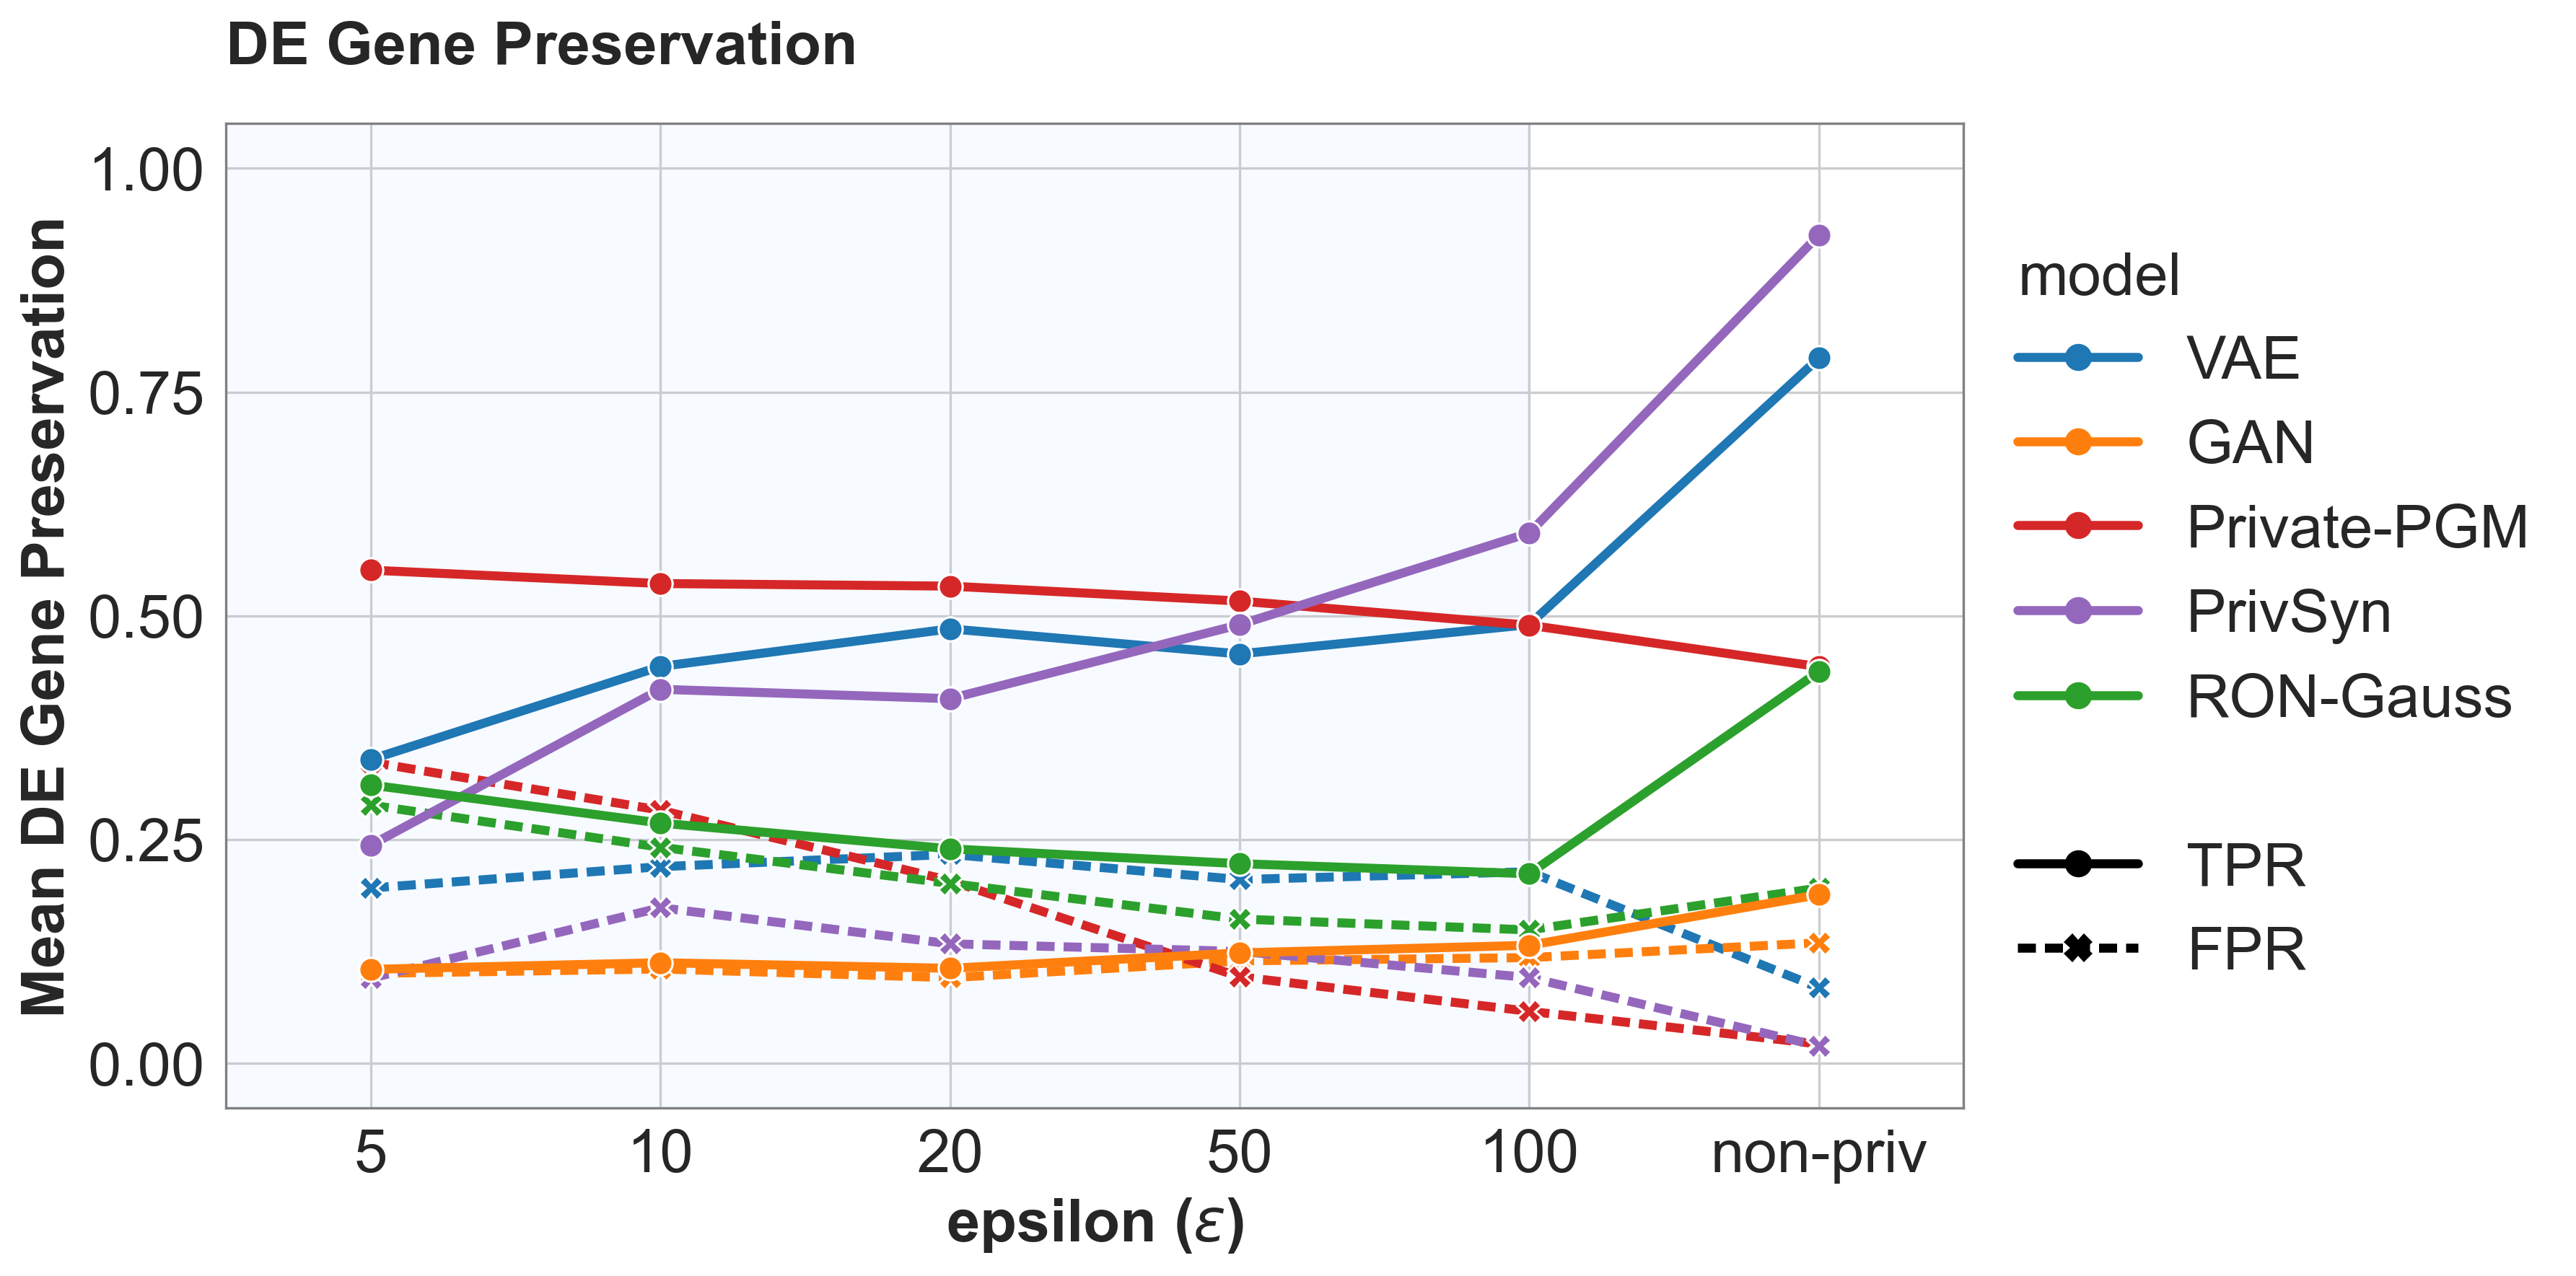

In [6]:
new_labels = {
    'VAE': 'VAE',
    'GAN': 'GAN',
    'RONGauss': 'RON-Gauss',
    'Private-PGM':"Private-PGM",
    'Privsyn':'PrivSyn'
}

df = pd.read_csv(f'{data_dir}/DE_data_k5.csv')
df.model = df.model.map(new_labels)
save_name='DE-plots_k5'
de_plots(df=df, save_name=save_name)

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The dashes list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The mark

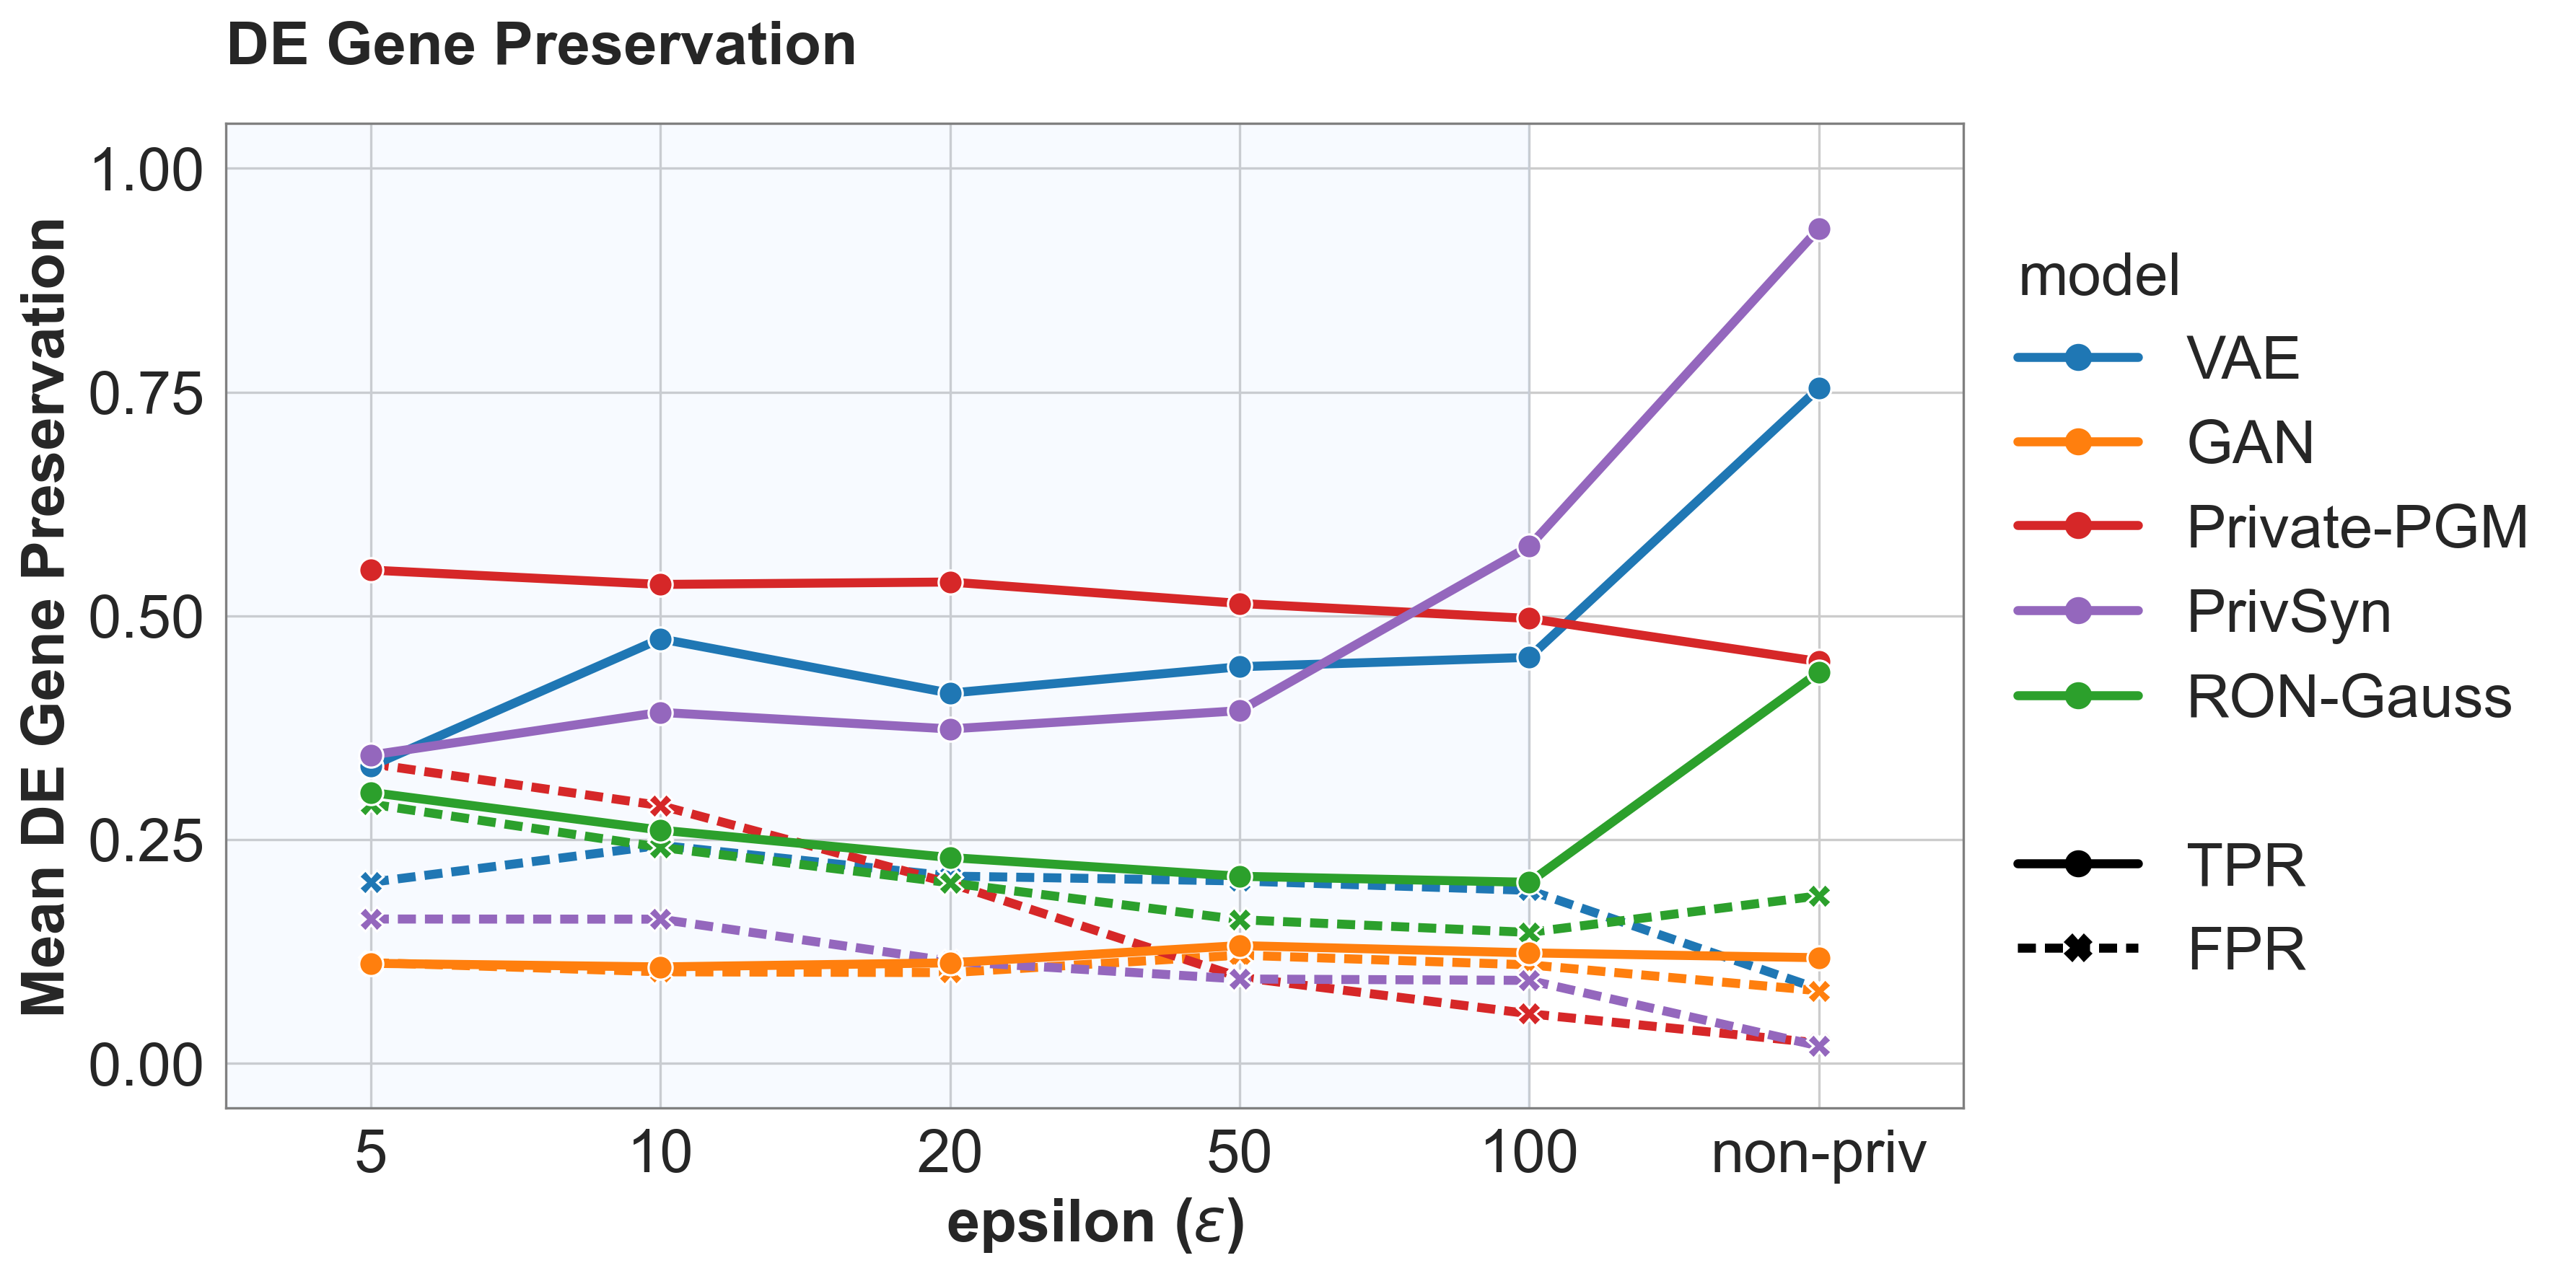

In [7]:
df = pd.read_csv(f'{data_dir}/DE_data_k1000.csv')
df.model = df.model.map(new_labels)
save_name='DE-plots_k1000'
de_plots(df=df, save_name=save_name)

## Other plots

In [8]:
new_labels = {
    'reference': 'Real data (reference)',
    'VAE': 'VAE',
    'GAN': 'GAN',
    'RONGauss': 'RON-Gauss',
    'PGM':"Private-PGM",
    'Privsyn':'PrivSyn'
}


df = pd.read_csv(f"{data_dir}/non-bio_combined_results.csv")
df.model_name = df.model_name.map(new_labels)

df_real = df.query("tag == 'real'").reset_index(drop=True)
df = df.query("tag != 'real'").reset_index(drop=True)


df.ep = df.ep.fillna('non-priv')
df['ep'] = df['ep'].apply(lambda x: str(int(x)) if x !='non-priv' else x)
df.head(6)

,tag,ep,k,s,C,unique_name,model_name,metric_name,score,bins,neighbors,alpha
0,dp,5,5,1000.0,0.01,VAE_dp_ep5_C0.01_k5_s1000,VAE,wasserstein_distance,0.068287,25.0,NaN,NaN
1,dp,10,5,1000.0,0.01,VAE_dp_ep10_C0.01_k5_s1000,VAE,wasserstein_distance,0.057748,25.0,NaN,NaN
2,dp,20,5,1000.0,0.01,VAE_dp_ep20_C0.01_k5_s1000,VAE,wasserstein_distance,0.055133,25.0,NaN,NaN
3,dp,50,5,1000.0,0.01,VAE_dp_ep50_C0.01_k5_s1000,VAE,wasserstein_distance,0.054887,25.0,NaN,NaN
4,dp,100,5,1000.0,0.01,VAE_dp_ep100_C0.01_k5_s1000,VAE,wasserstein_distance,0.055639,25.0,NaN,NaN
5,nondp,non-priv,5,1000.0,NaN,VAE_nondp_k5_s1000,VAE,wasserstein_distance,0.025917,25.0,NaN,NaN


In [23]:
def plot_metric(metric_name):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

    markersize=8
    linewidth=3
    fontsize=20

    custom_dashes = [2,1]
    ylim=[-0.05, 1.05]
    xlim=[-0.5, 5.5]

    


    multiple_locator=0.25
    
    df_hist = df[df['metric_name'] == metric_name]

    xlabel=r'epsilon ($\varepsilon$)'
    if metric_name == 'histogram_intersection':
        ylabel='Overlap Score [%]'
        title='Histogram Intersection'
    elif metric_name == 'efficacy_test':
        ylabel='Accuracy Score [%]'
        title='Machine Learning Efficacy'
    elif metric_name == 'closeness_approximation':
        ylabel='KNN Distance Score'
        title='Distance to Closest Record'
        ylim=[1.9, 4.9]
        multiple_locator=0.4
    elif metric_name == 'wasserstein_distance':
        ylabel='Wasserstein Distance Score'
        title='Wasserstein Distance'
        ylim=[0.0, 0.13]
        multiple_locator=0.02
    elif metric_name == 'jensonshannon_distance':
        ylabel='Similarity Score [%]'
        title='Jenson-Shannon Distance'
    
    fill_between = [(xlim[0], 4), ylim, '#b3d4ff', 0.1]


    color_map={
        'VAE':'C0',
        'GAN':'C1',
        'RON-Gauss':'C2',
        'Private-PGM':'C3',
        'PrivSyn':'C4'}



    g = plot_line(
        data=df_hist,
        x="ep", 
        y="score", 
        hue='model_name',
        style="model_name",
        markers='o', 
        dashes=[custom_dashes, [1,1]], 
        errorbar=('ci', 95), 
        markersize=markersize, 
        linewidth=linewidth,
        alpha=1, 
        palette=color_map,
        legend=True,
        fill_between=fill_between,
        xlim=xlim,
        ylim=ylim,
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        fontsize=fontsize,
        multiple_locator=multiple_locator,
        ax=ax)

    # Plot real data reference
    df_real_mean = df_real[df_real["metric_name"] == metric_name].score.mean()
    g.axhline(df_real_mean, c="k", linestyle="--", linewidth=linewidth, label="Real data (Reference)")

    # Create the legend with the extended handles/labels
    legend=g.legend(ncols=2, 
                    loc='center left', 
                    bbox_to_anchor=(-0.1,-0.4), 
                    fontsize=fontsize, 
                    frameon=True)

    legend._legend_box.align = "left"
    legend.set_title("model", prop = { "size": fontsize})
    
    for line in legend.get_lines():
            line.set_linewidth(linewidth)
            line.set_markersize(markersize)


    # Adjust the plot's layout so the legend is visible (it might get cut off otherwise)
#     plt.tight_layout()

    plt.savefig(f"{save_path}/{metric_name}_averaged.pdf", format="pdf", bbox_inches="tight")


/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The dashes list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)


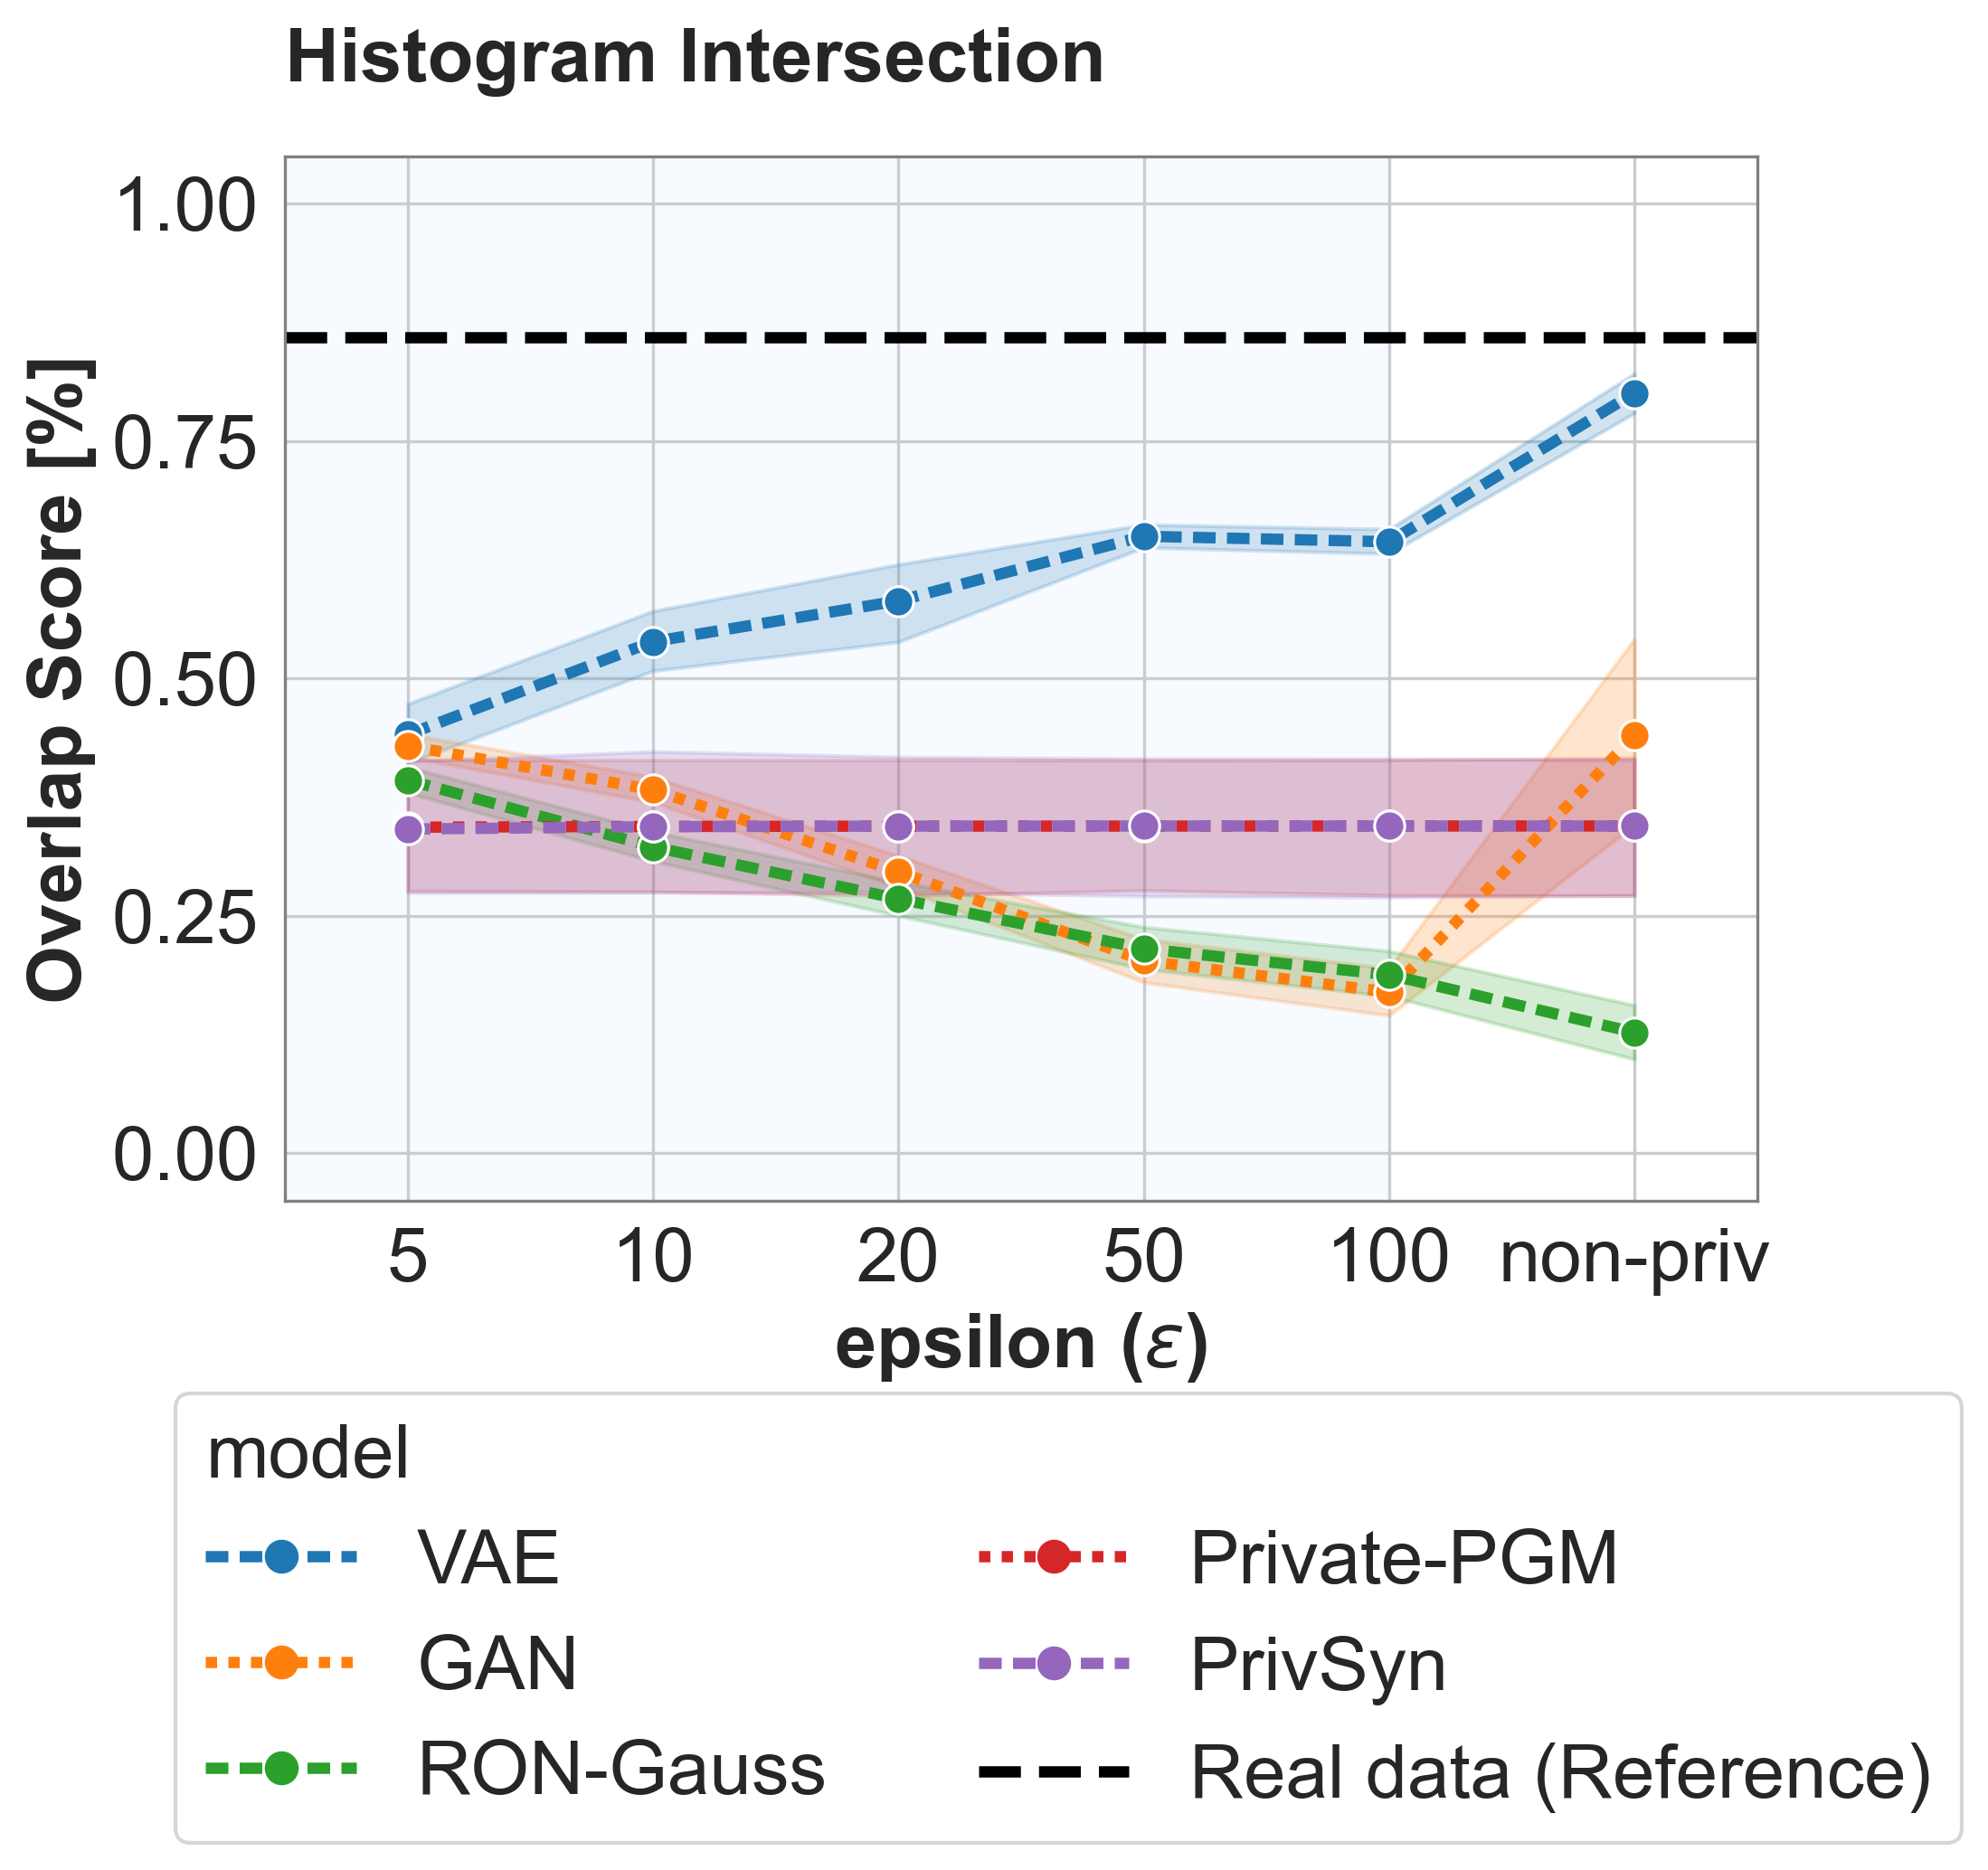

In [24]:
metric_name='histogram_intersection'
plot_metric(metric_name)

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The dashes list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)


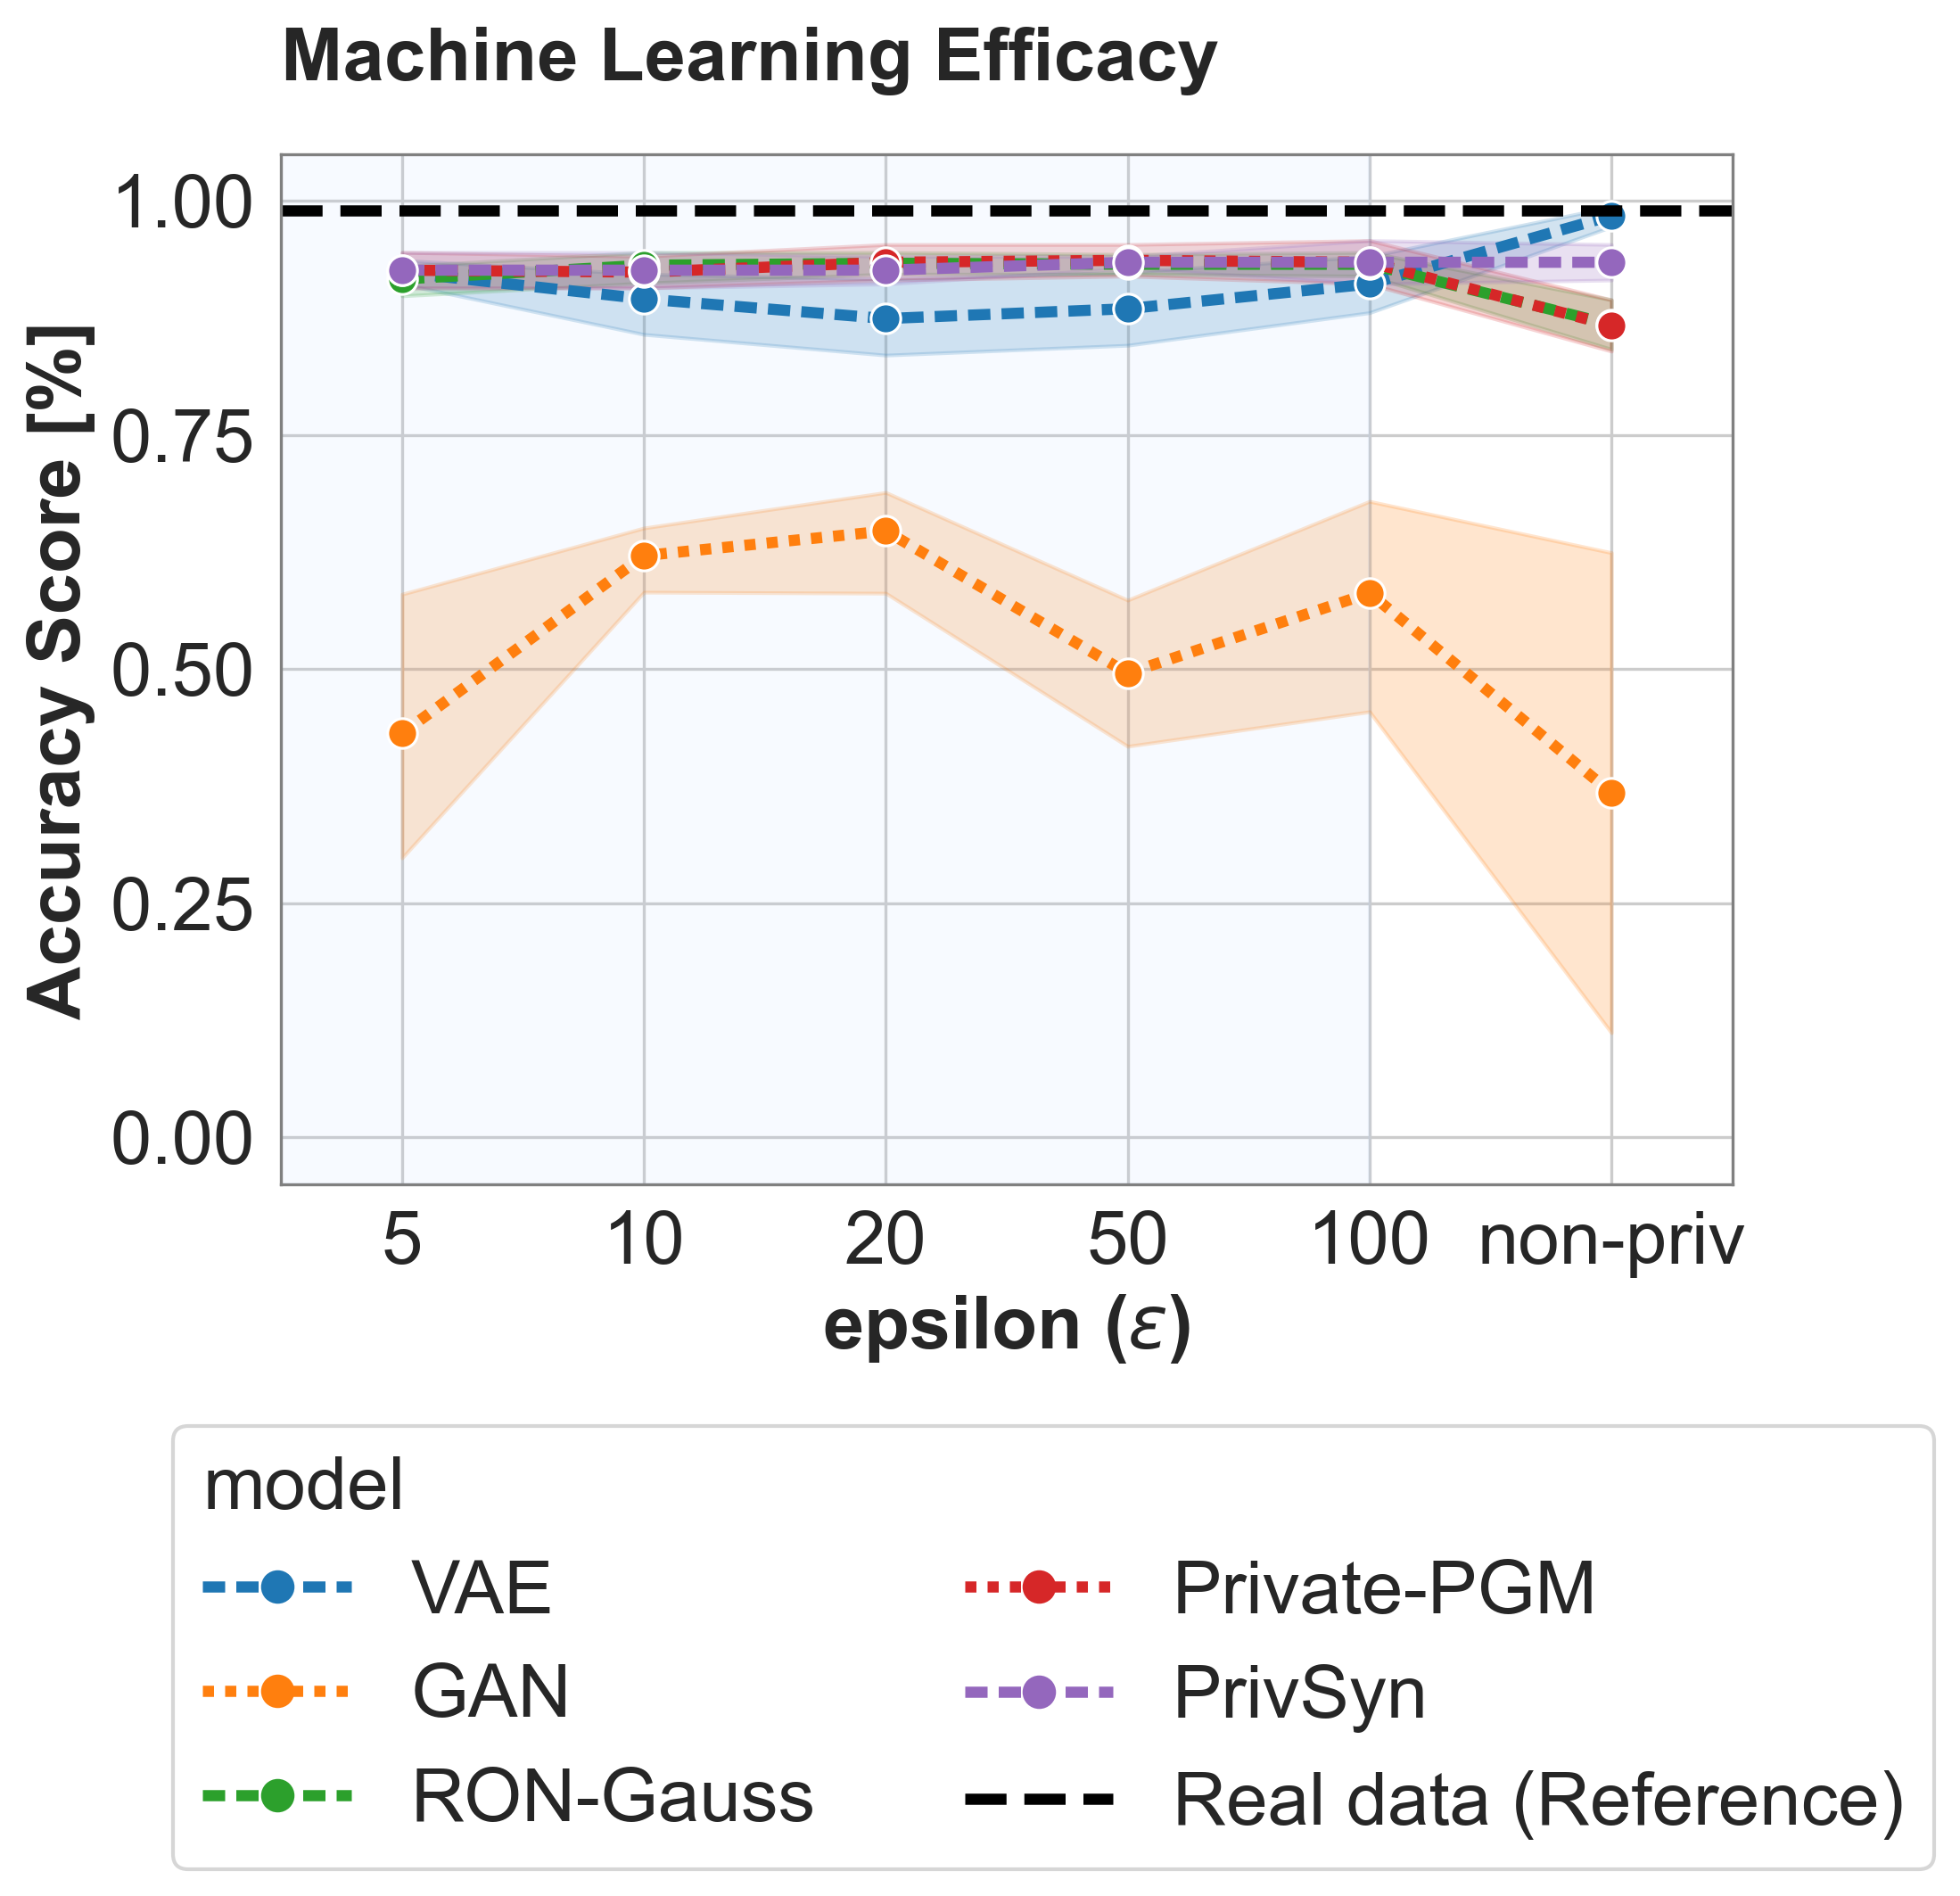

In [11]:
metric_name='efficacy_test'
plot_metric(metric_name)

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The dashes list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)


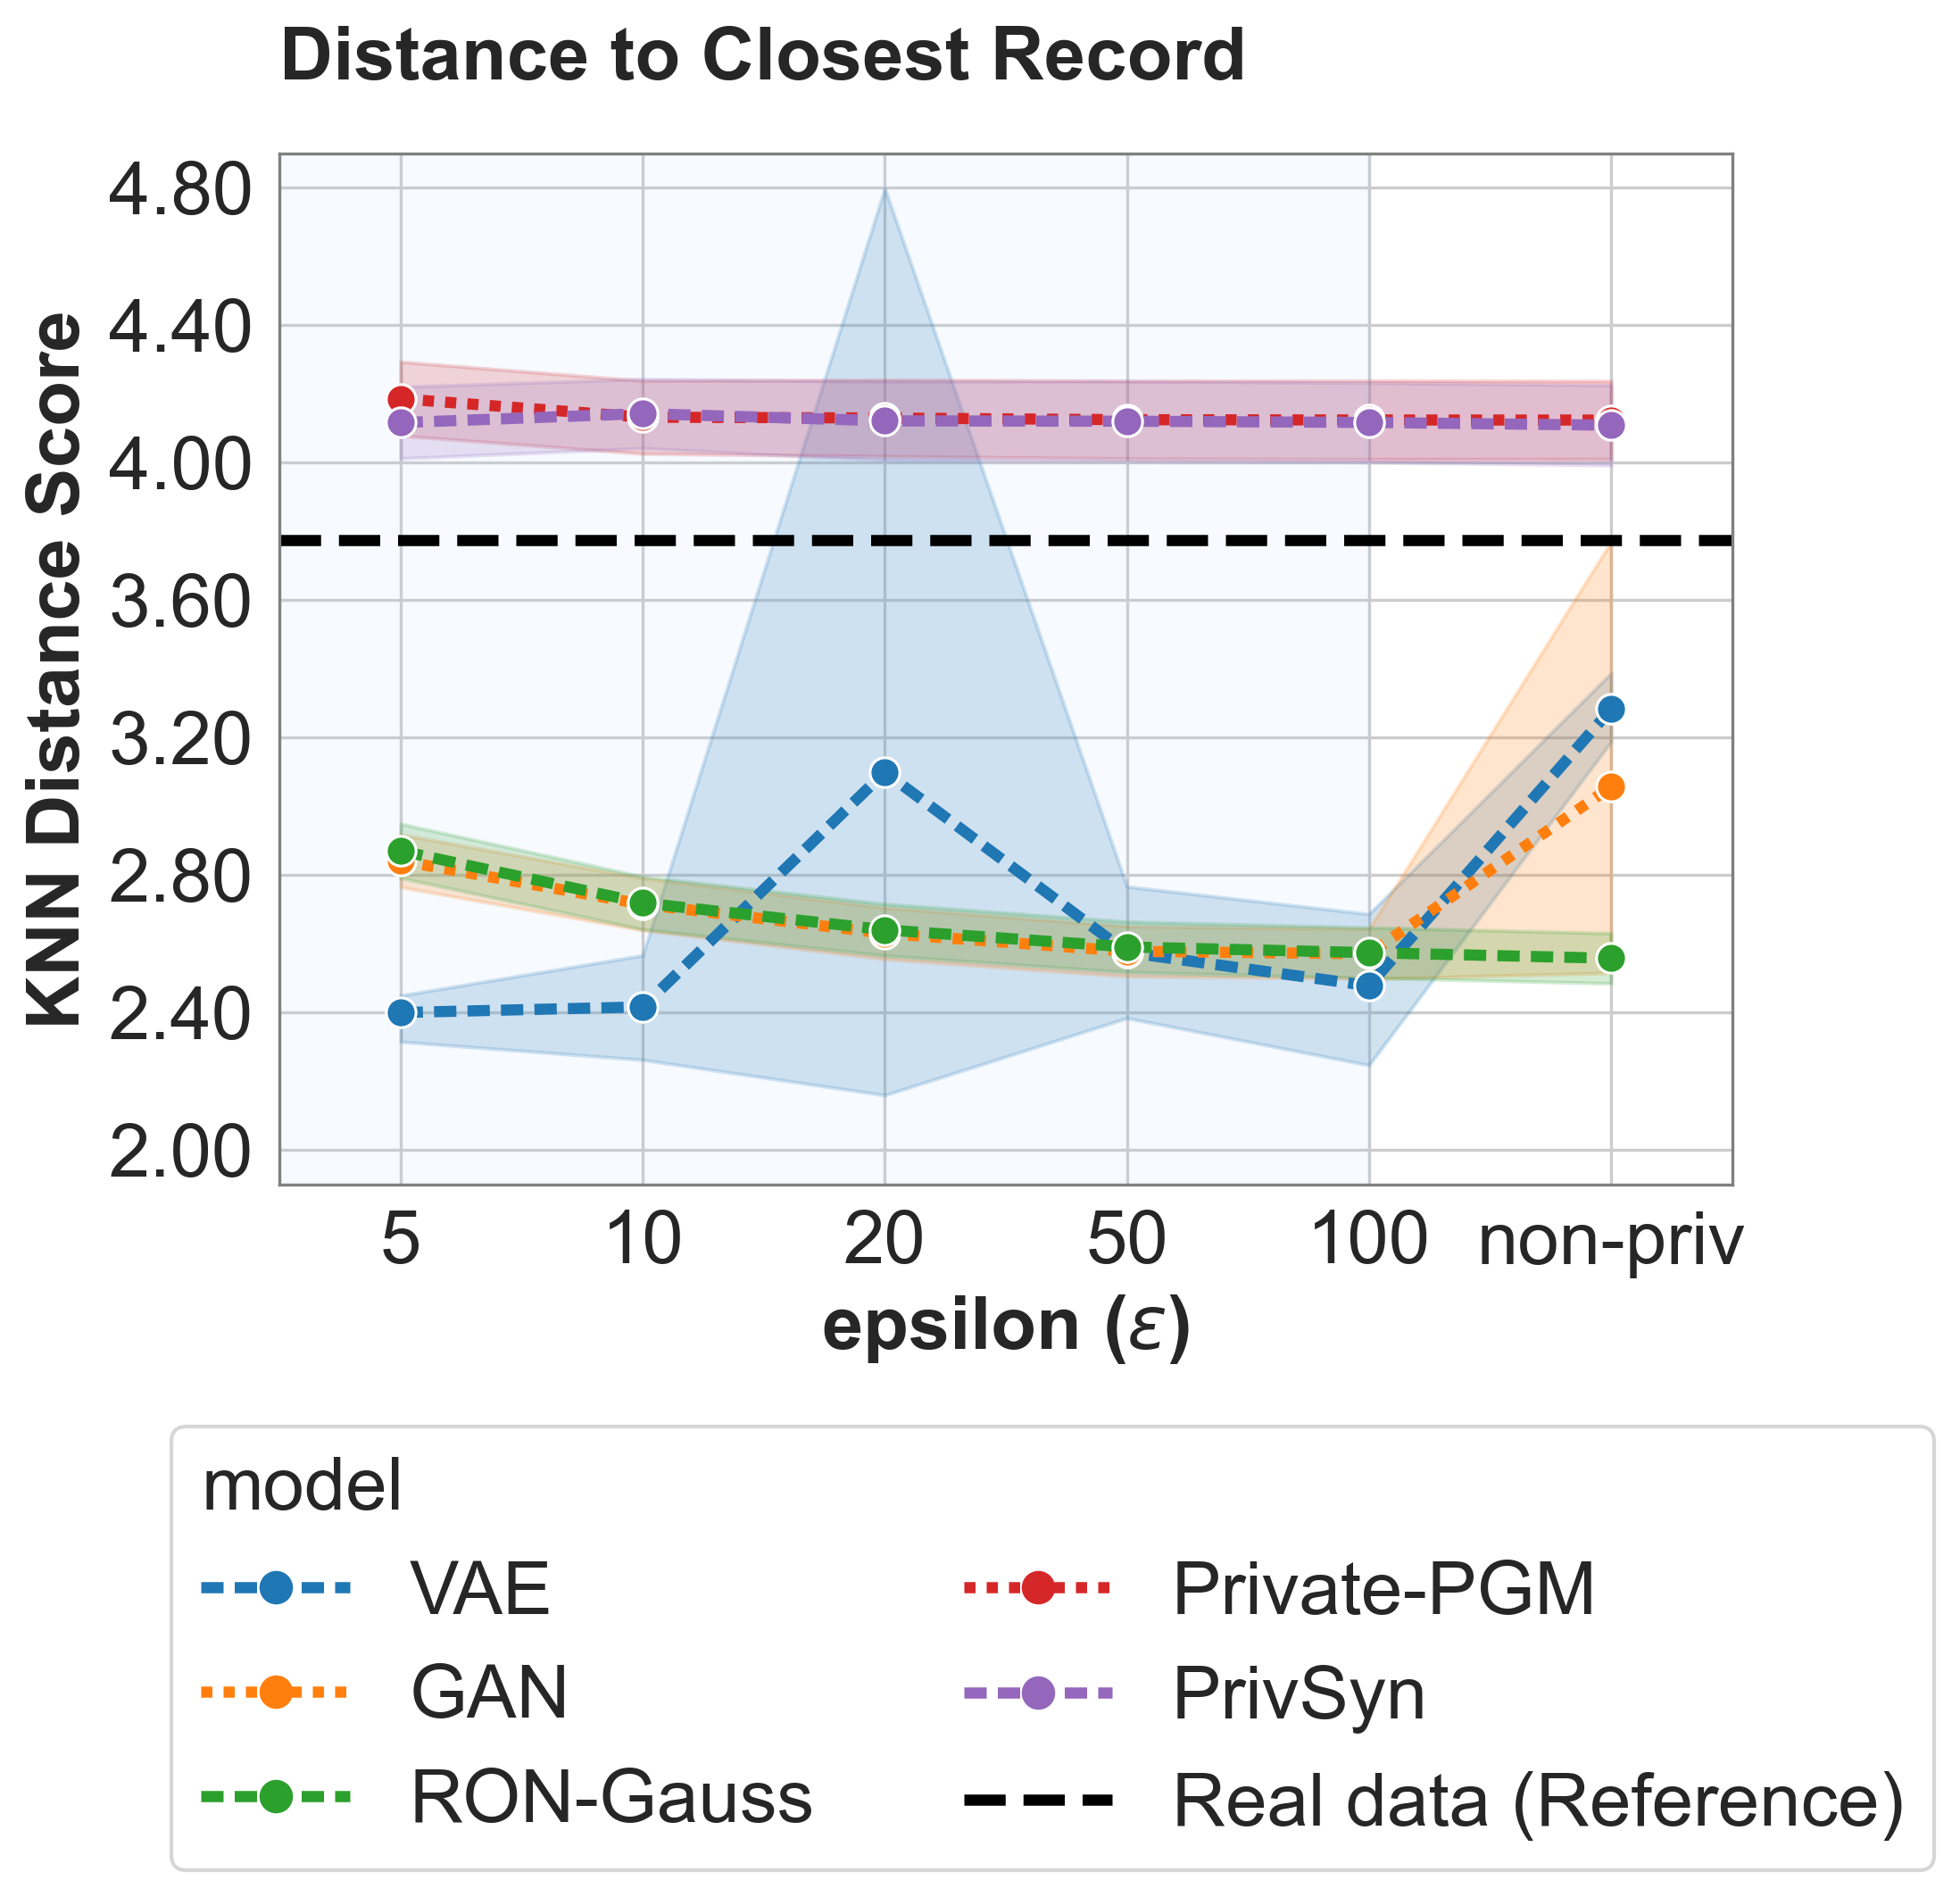

In [12]:
metric_name='closeness_approximation'
plot_metric(metric_name)

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The dashes list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)


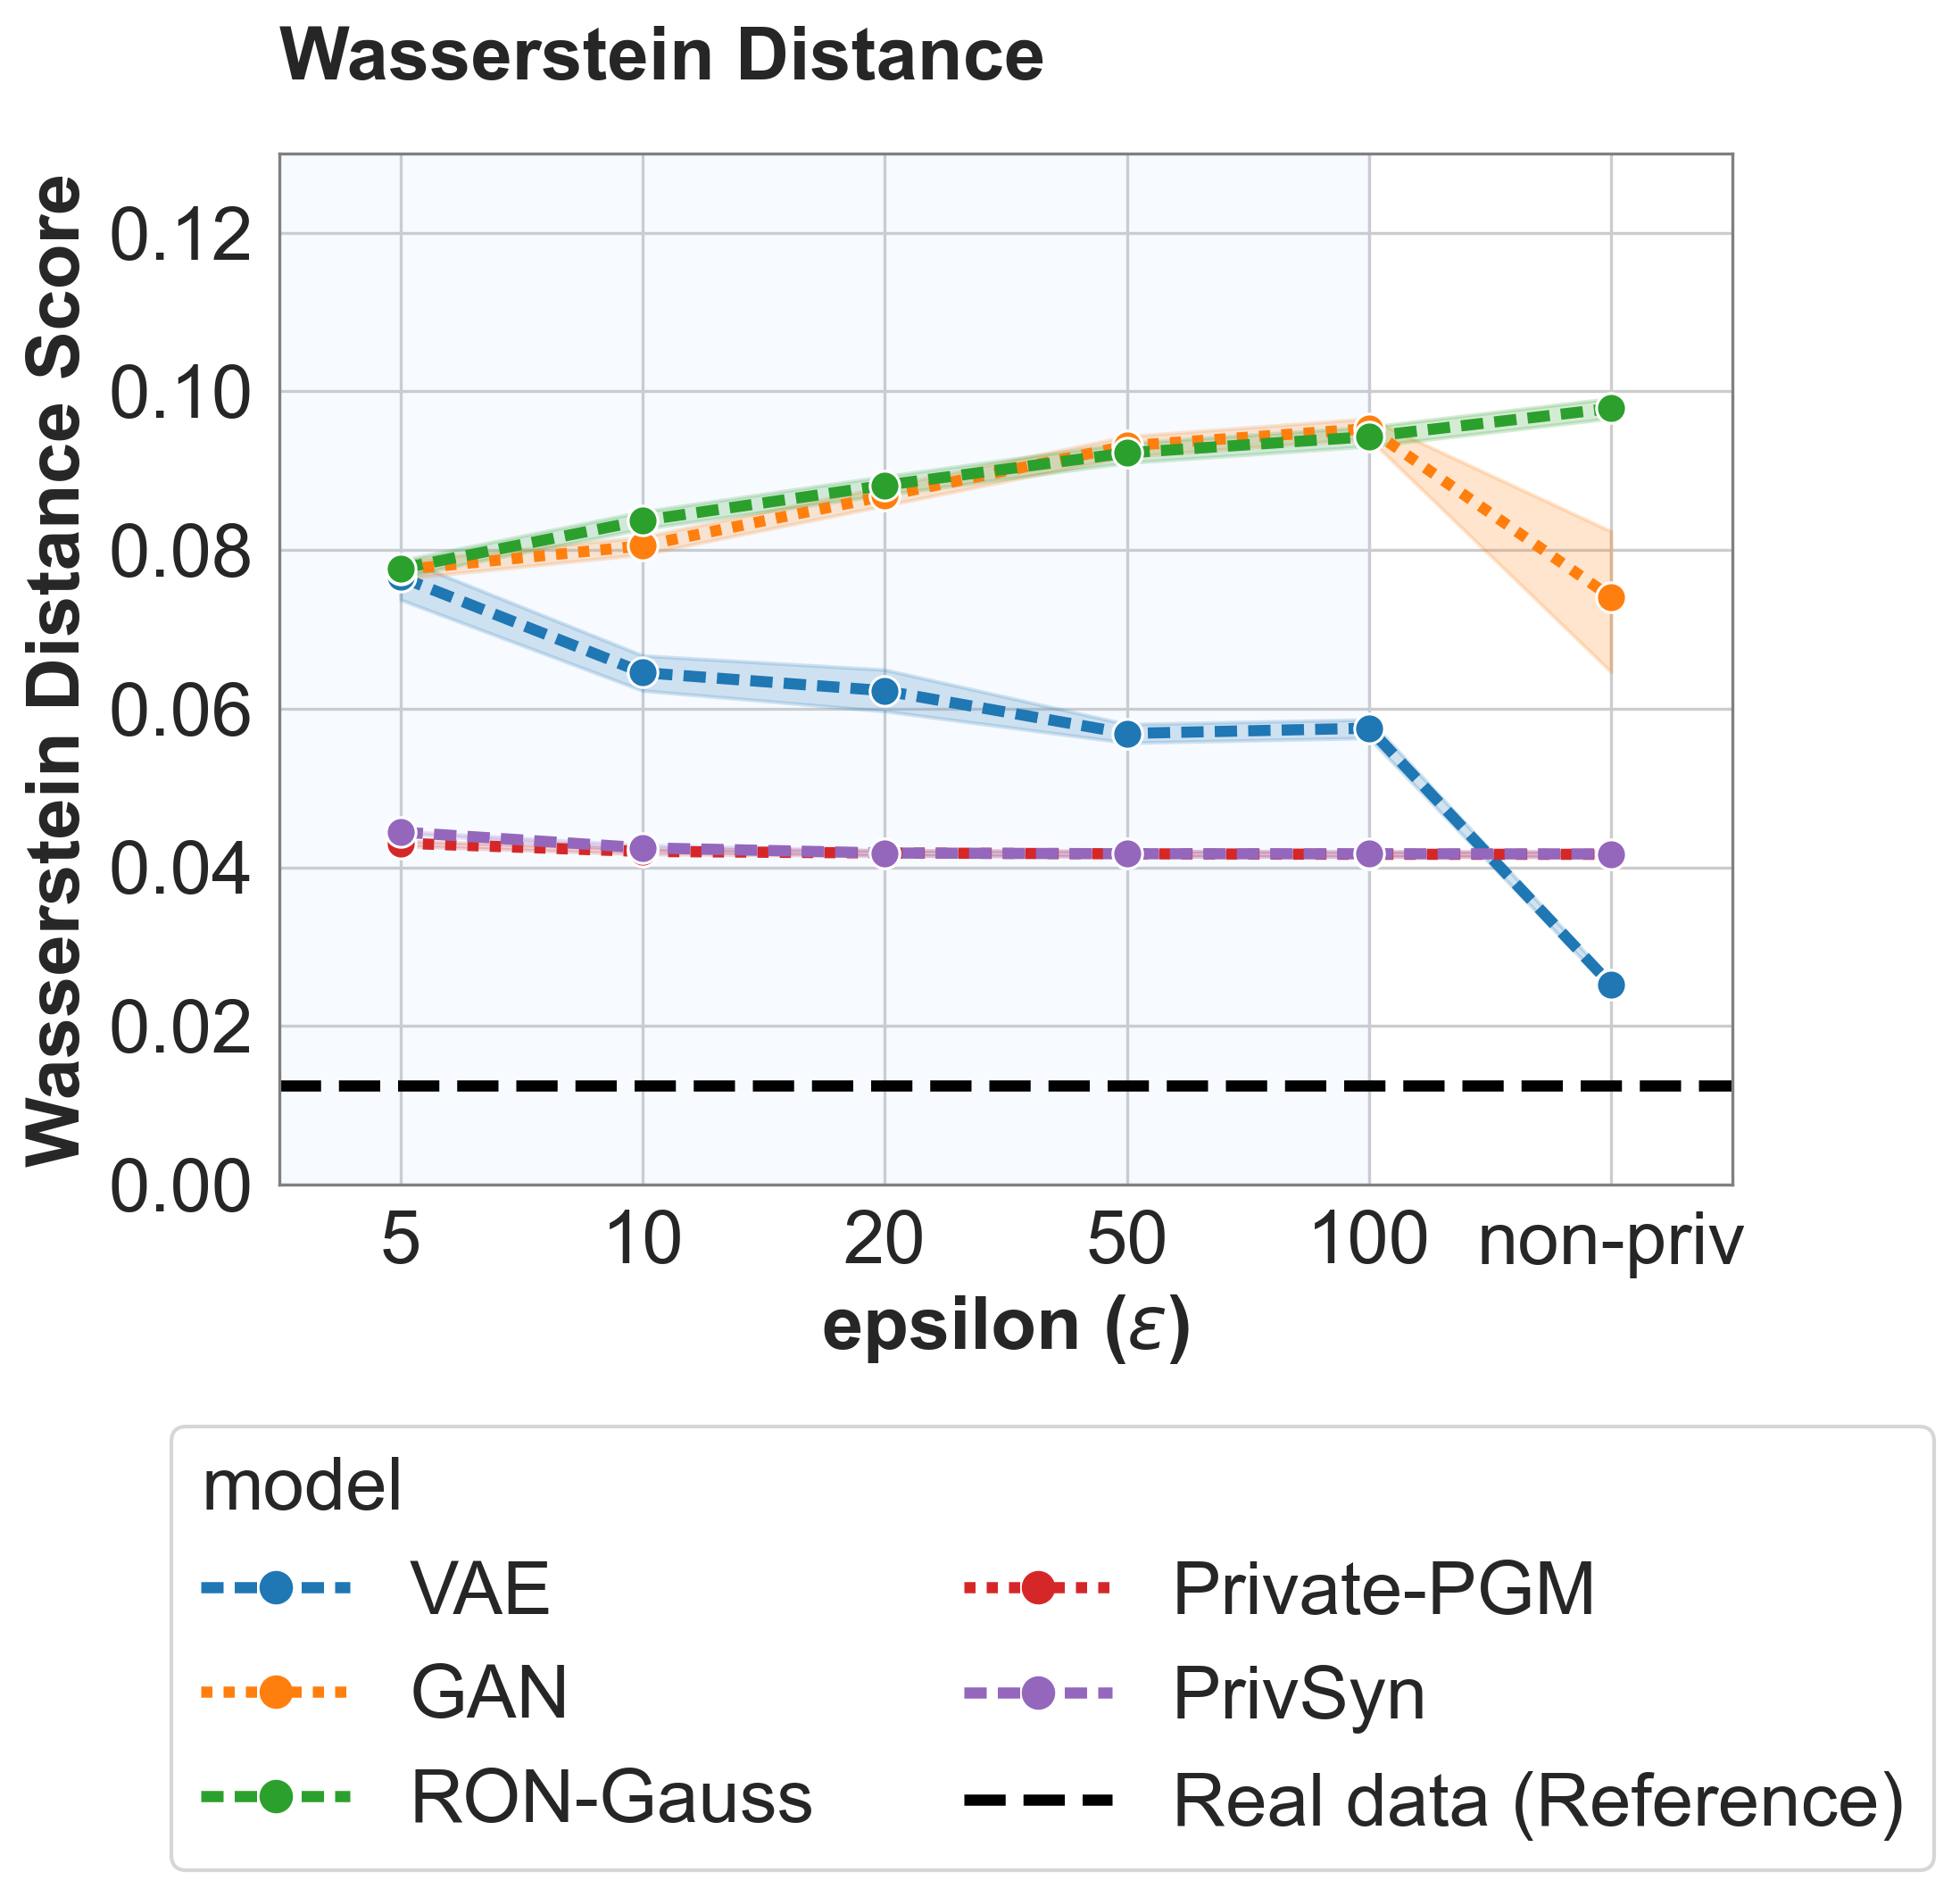

In [13]:
metric_name='wasserstein_distance'
plot_metric(metric_name)

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:10: UserWarning: 
The dashes list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.lineplot(
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontsize=fontsize)
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_63571/1887889402.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=fontsize)


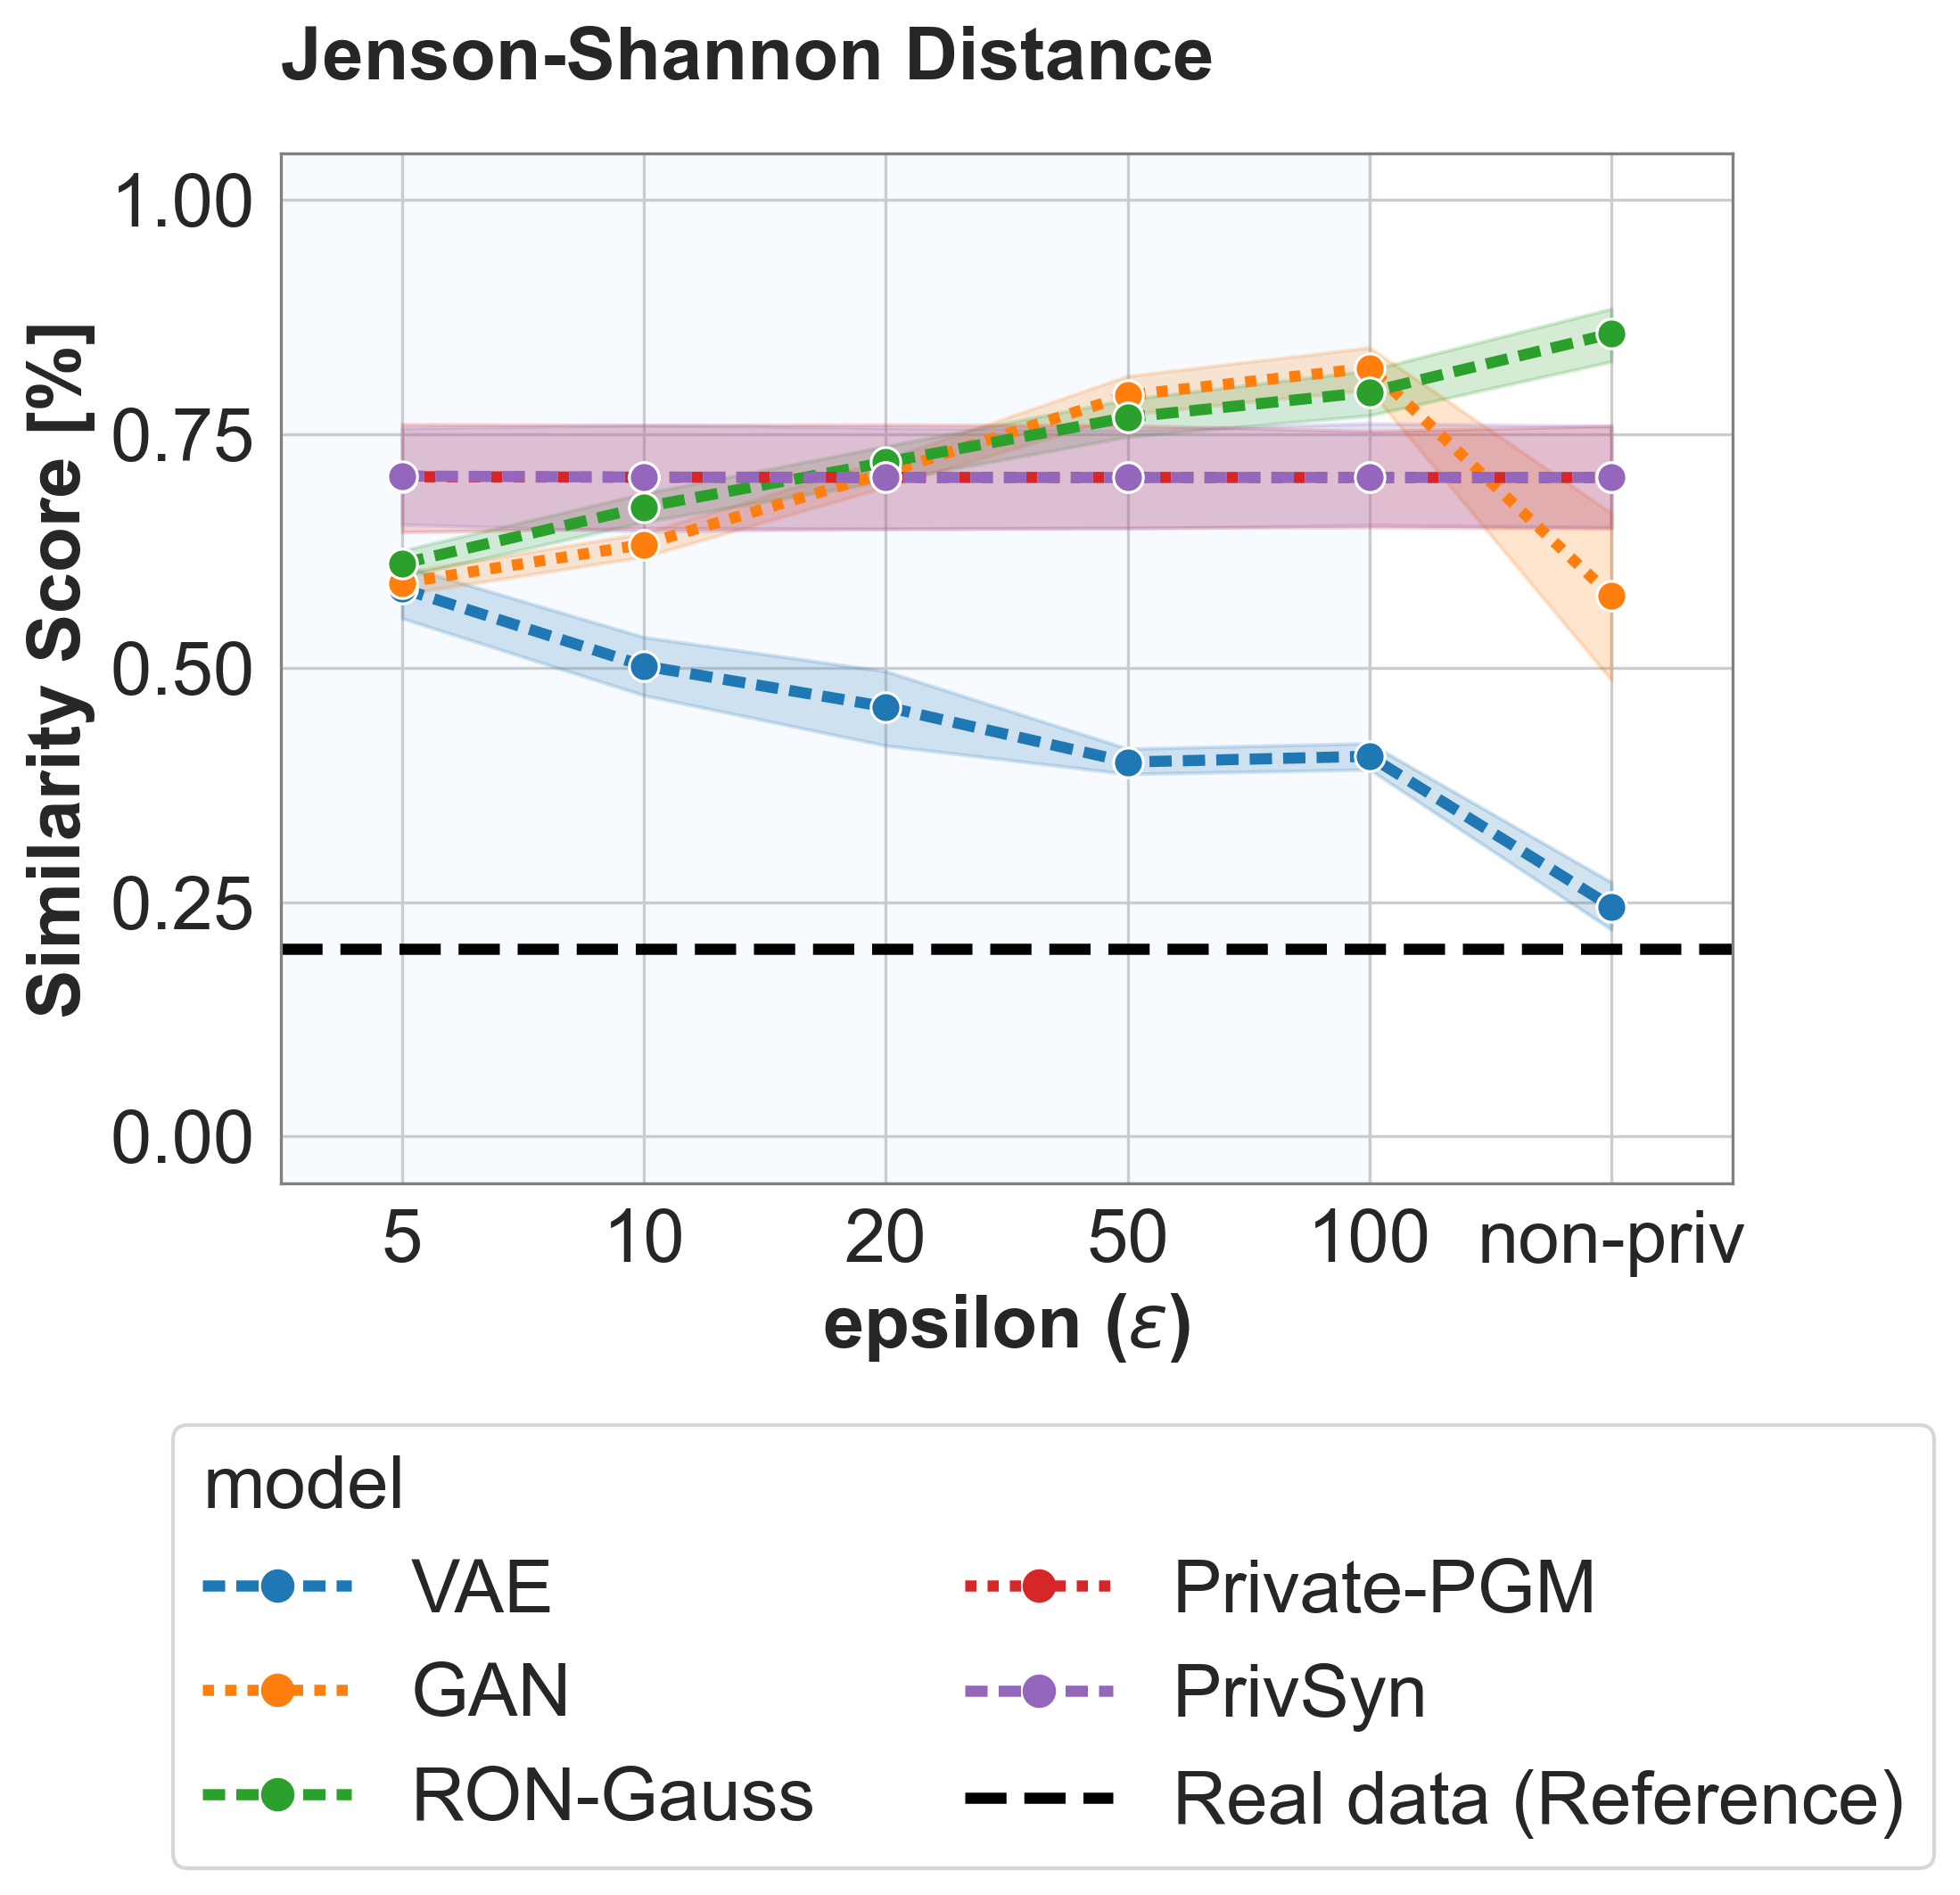

In [14]:
metric_name='jensonshannon_distance'
plot_metric(metric_name)

In [15]:
df_marginal = df.query("metric_name == 'wasserstein_distance' or metric_name =='jensonshannon_distance' or metric_name =='histogram_intersection'")

In [16]:
df_marginal = {"wasserstein_distance": df.query("metric_name == 'wasserstein_distance'")["score"].values,
               "jensonshannon_distance": df.query("metric_name == 'jensonshannon_distance'")["score"].values,
               "histogram_intersection": df.query("metric_name == 'histogram_intersection'")["score"].values
              }

df_marginal = pd.DataFrame(df_marginal)

In [17]:
columns_map={
    'wasserstein_distance': 'Wasserstein Distance',
    'jensonshannon_distance': 'Jenson-Shannon Distance',
    'histogram_intersection': 'Histogram Intersection',
}

In [18]:
df_marginal = df_marginal.rename(columns=columns_map)

In [19]:
corr = df_marginal.corr()
# corr = corr.style.background_gradient(cmap='coolwarm').set_precision(2)

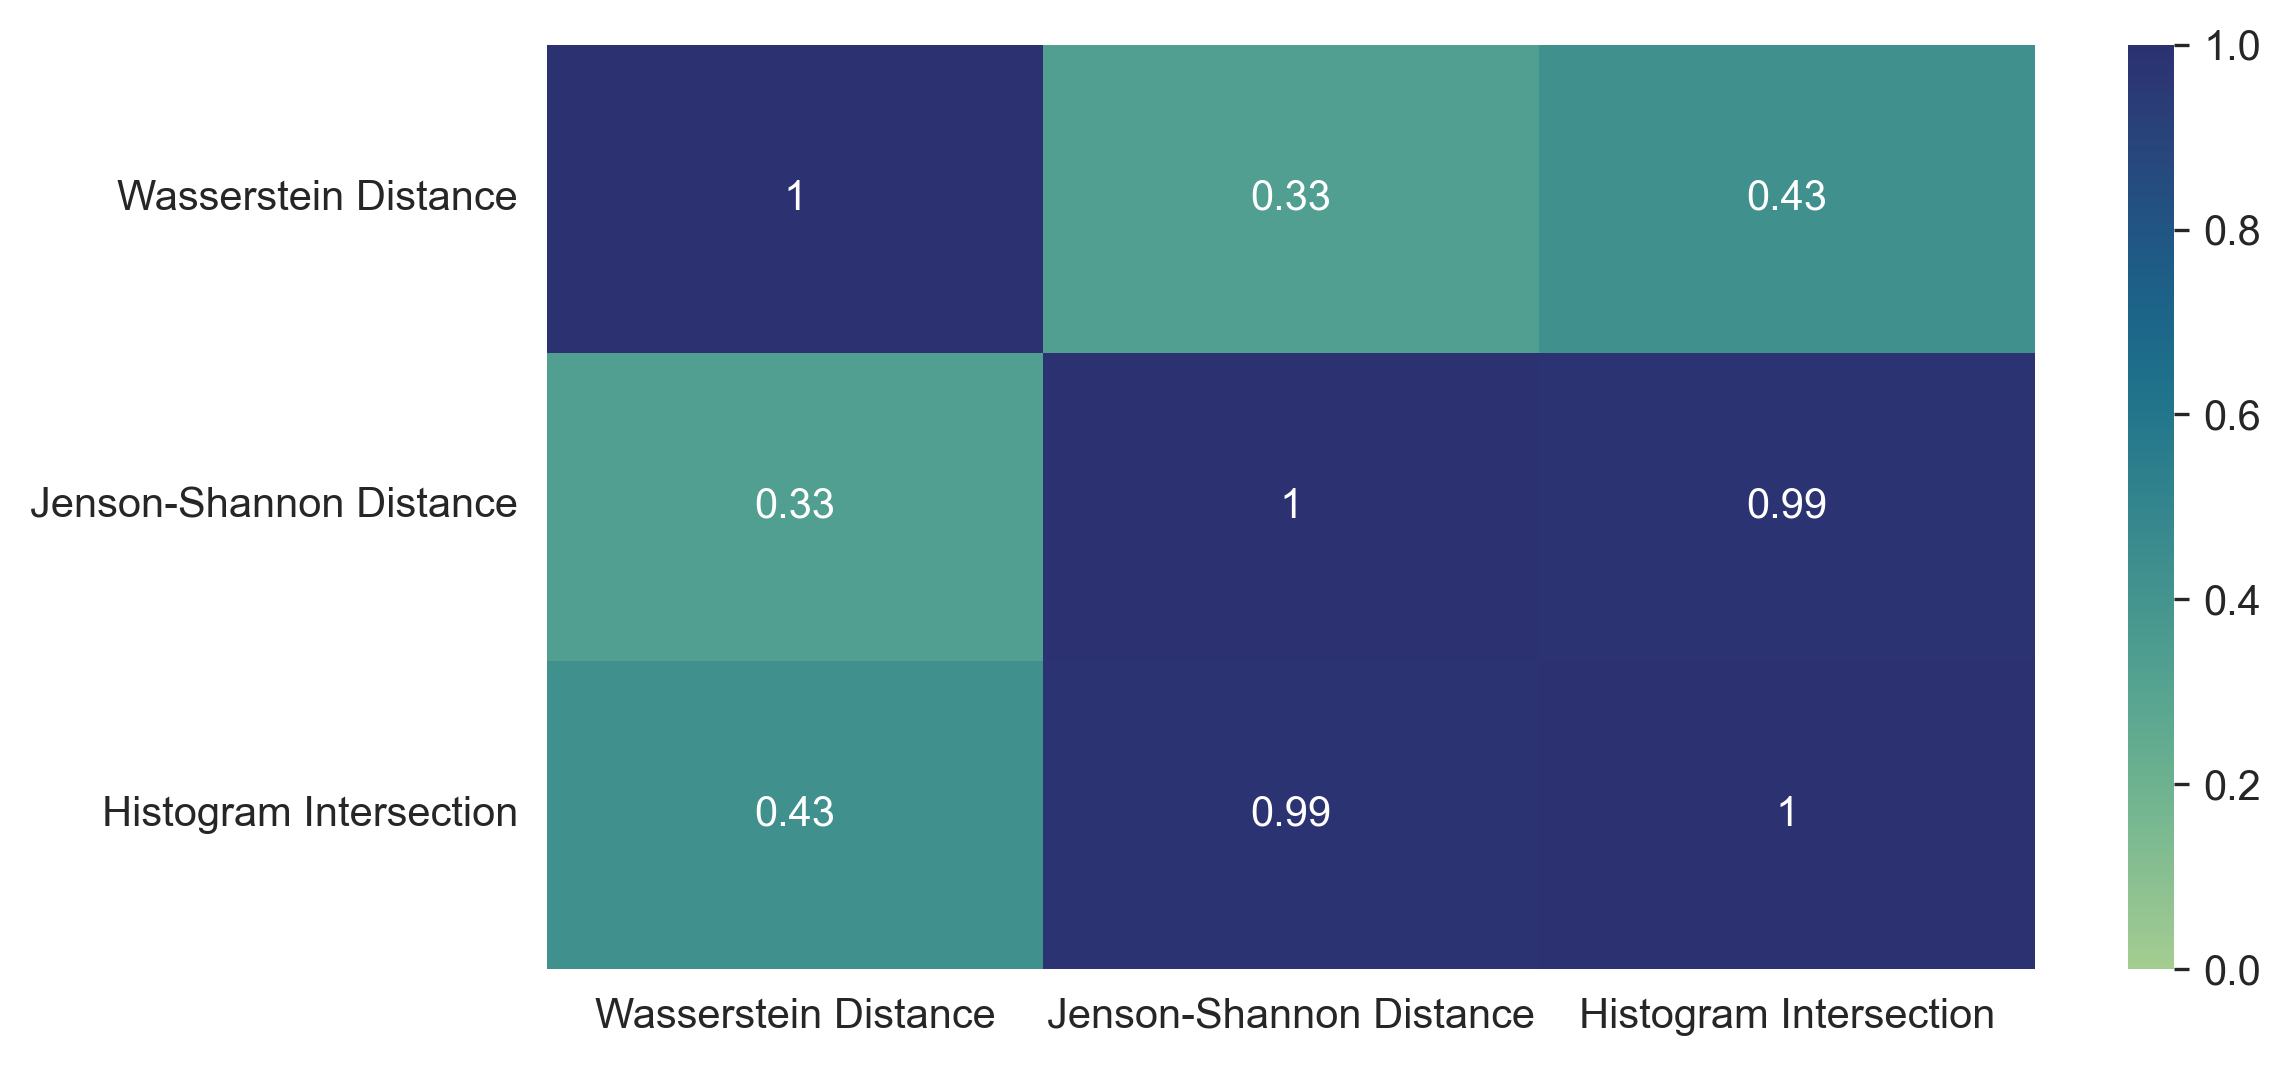

In [20]:
plt.figure(figsize=(8, 4), dpi=300)
sns.heatmap(corr.abs(), 
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            vmax=1, vmin=0,
            cmap='crest', fmt=".2g");
plt.savefig(f"{save_path}/marginal_corr.pdf", format="pdf", bbox_inches="tight")